In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re


In [95]:
df_metadata = pd.read_csv('gutenberg_with_text.csv')

In [96]:
def get_book_paragraphs(book:str):
    paragraphs = book.split('\n\n')
    return paragraphs

In [97]:
#for each author, get mean paragraph length
authors = []
mean_paragraph_lengths = []
num_paragraphs = []
normalized_num_paragraphs = []
for index, row in df_metadata.iterrows():
    authors.append(row['Authors'])
    paragraphs = get_book_paragraphs(row['Books'])
    num_paragraphs.append(len(paragraphs))
    mean_paragraph_lengths.append(np.mean([len(paragraph) for paragraph in paragraphs]))
    normalized_num_paragraphs.append(len(paragraphs)/len(row['Books']))
#sort by mean paragraph length
df_paragraphs = pd.DataFrame({'Author': authors, 'Mean Paragraph Length': mean_paragraph_lengths, 'Number of Paragraphs': num_paragraphs, 'Normalized Number of Paragraphs': normalized_num_paragraphs})
df_paragraphs
   

,Author,Mean Paragraph Length,Number of Paragraphs,Normalized Number of Paragraphs
0,"Alcott, Louisa May",283.567839,199,0.003502
1,"Austen, Jane",359.908738,515,0.002763
2,"Balzac, Honoré de",122.216471,1275,0.008051
3,"Barrie, J. M. (James Matthew)",340.781863,408,0.002917
4,"Baum, L. Frank (Lyman Frank)",198.165138,1090,0.004996
...,...,...,...,...
67,"Wells, H. G. (Herbert George)",277.853594,2657,0.003573
68,"Wharton, Edith",323.735264,967,0.003070
69,"Widger, David",358.983333,360,0.002770
70,"Wilde, Oscar",197.607223,443,0.005010


[Text(0, 0.5, '')]

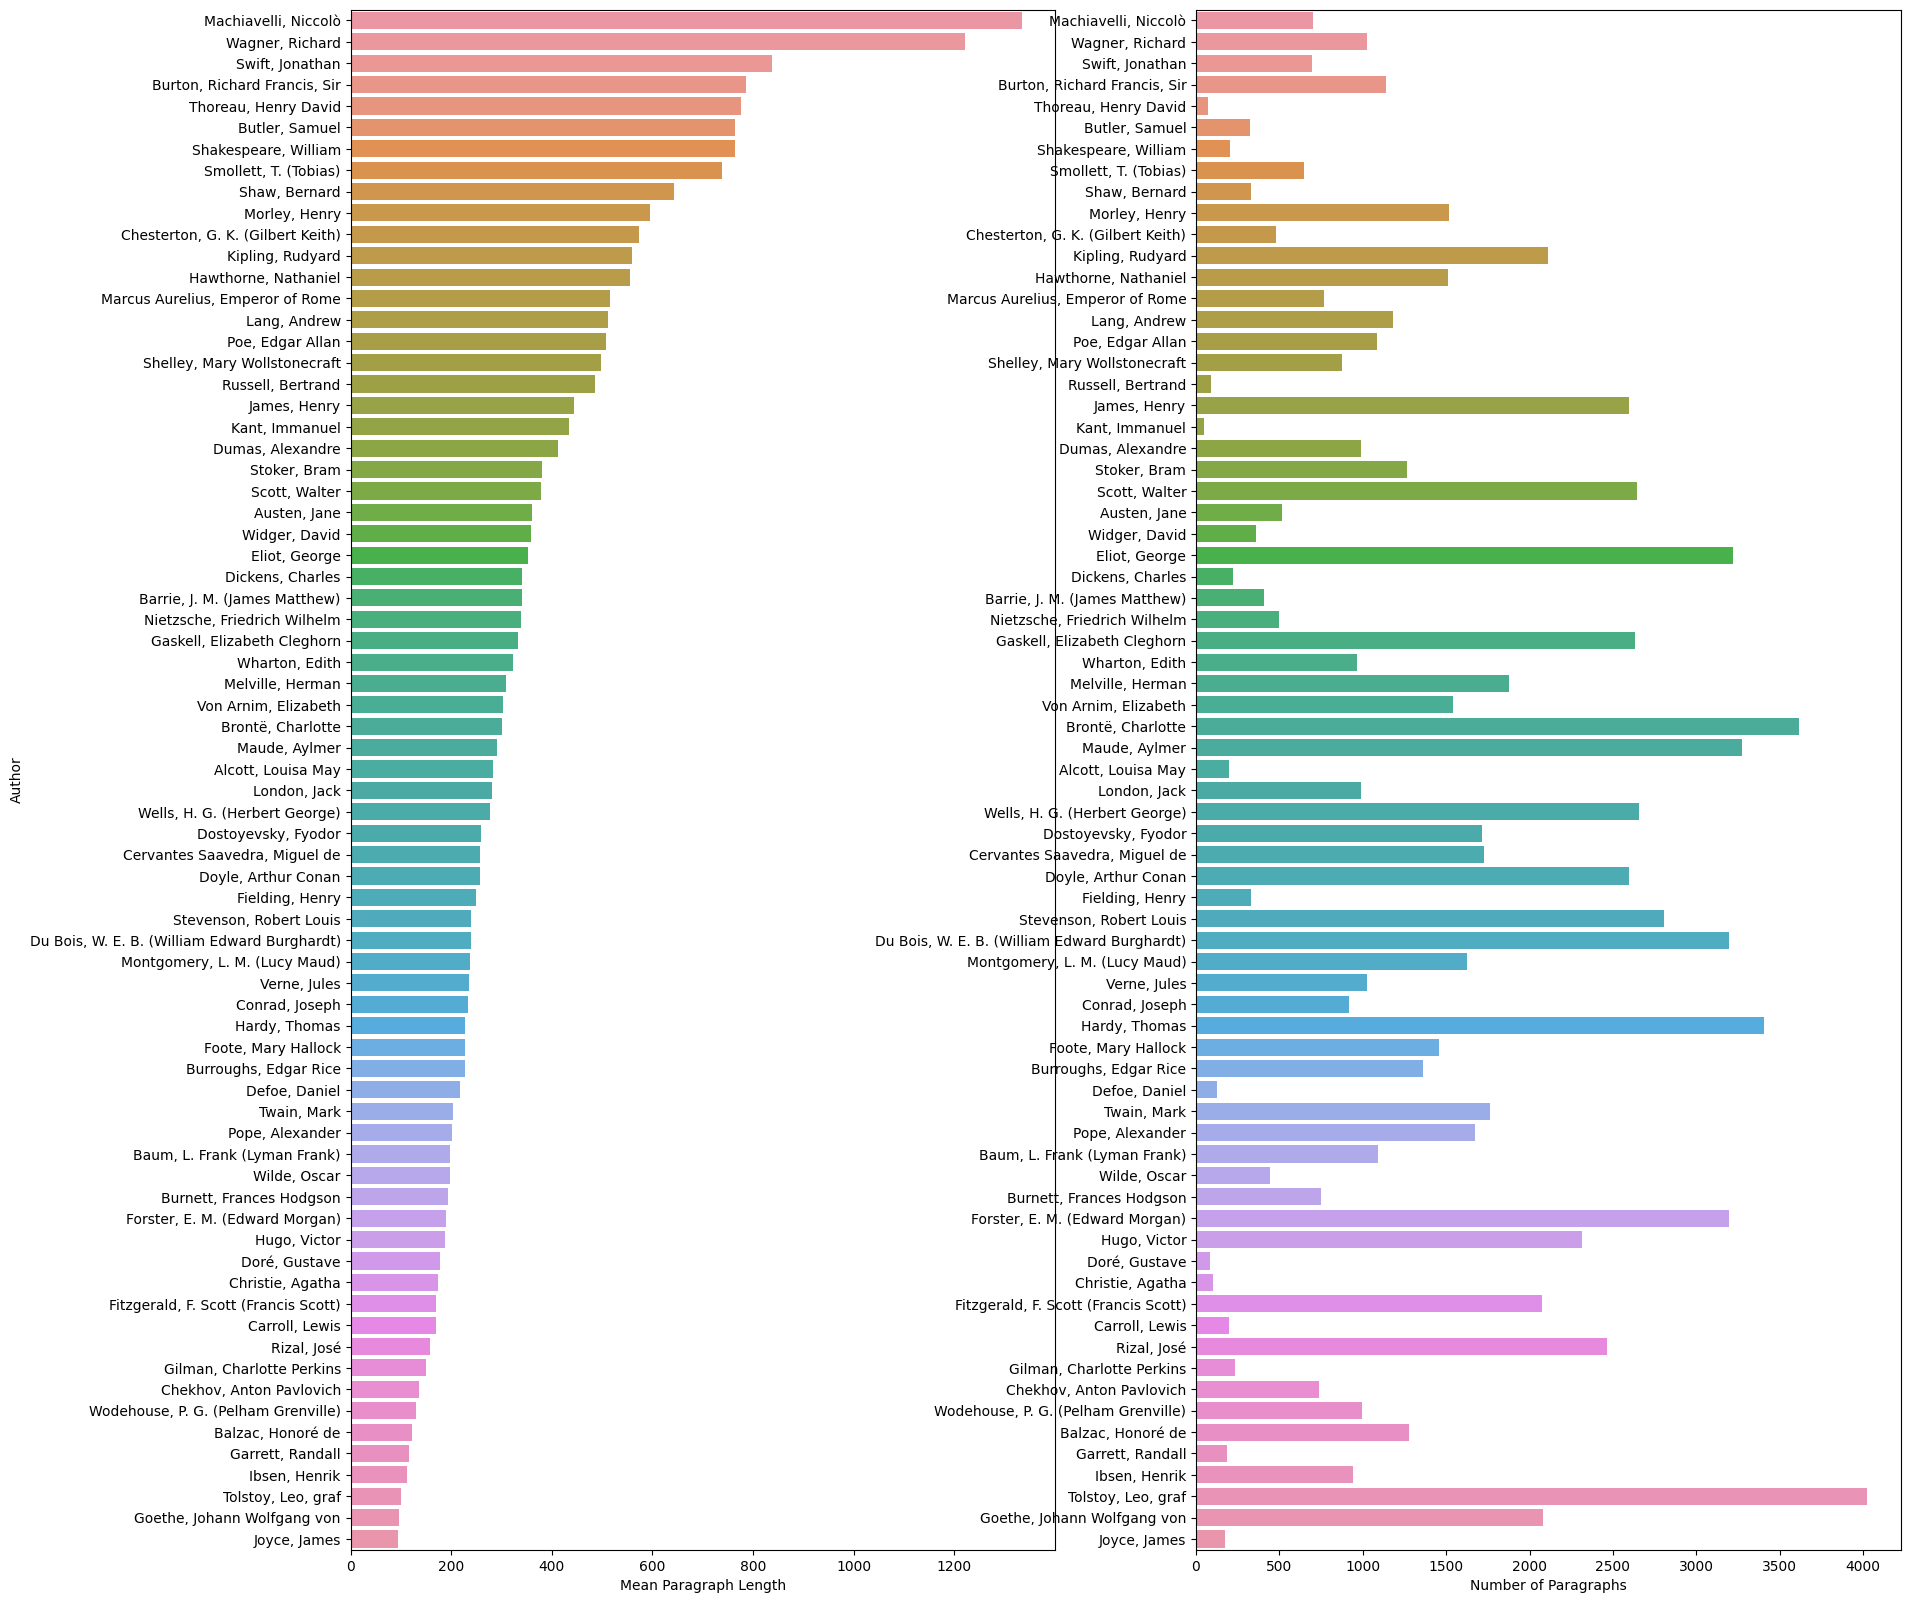

In [98]:
#plot sorted mean paragraph length vs author
df_paragraphs = df_paragraphs.sort_values(by=['Mean Paragraph Length'], ascending=False)

#plot with seaborn without authors
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
ax = sns.barplot(x="Mean Paragraph Length", y="Author", data=df_paragraphs)
plt.subplot(1,2,2)
#sns remove y label
ax = sns.barplot(x="Number of Paragraphs", y="Author", data=df_paragraphs)
ax.set(ylabel=None)

[Text(0, 0.5, '')]

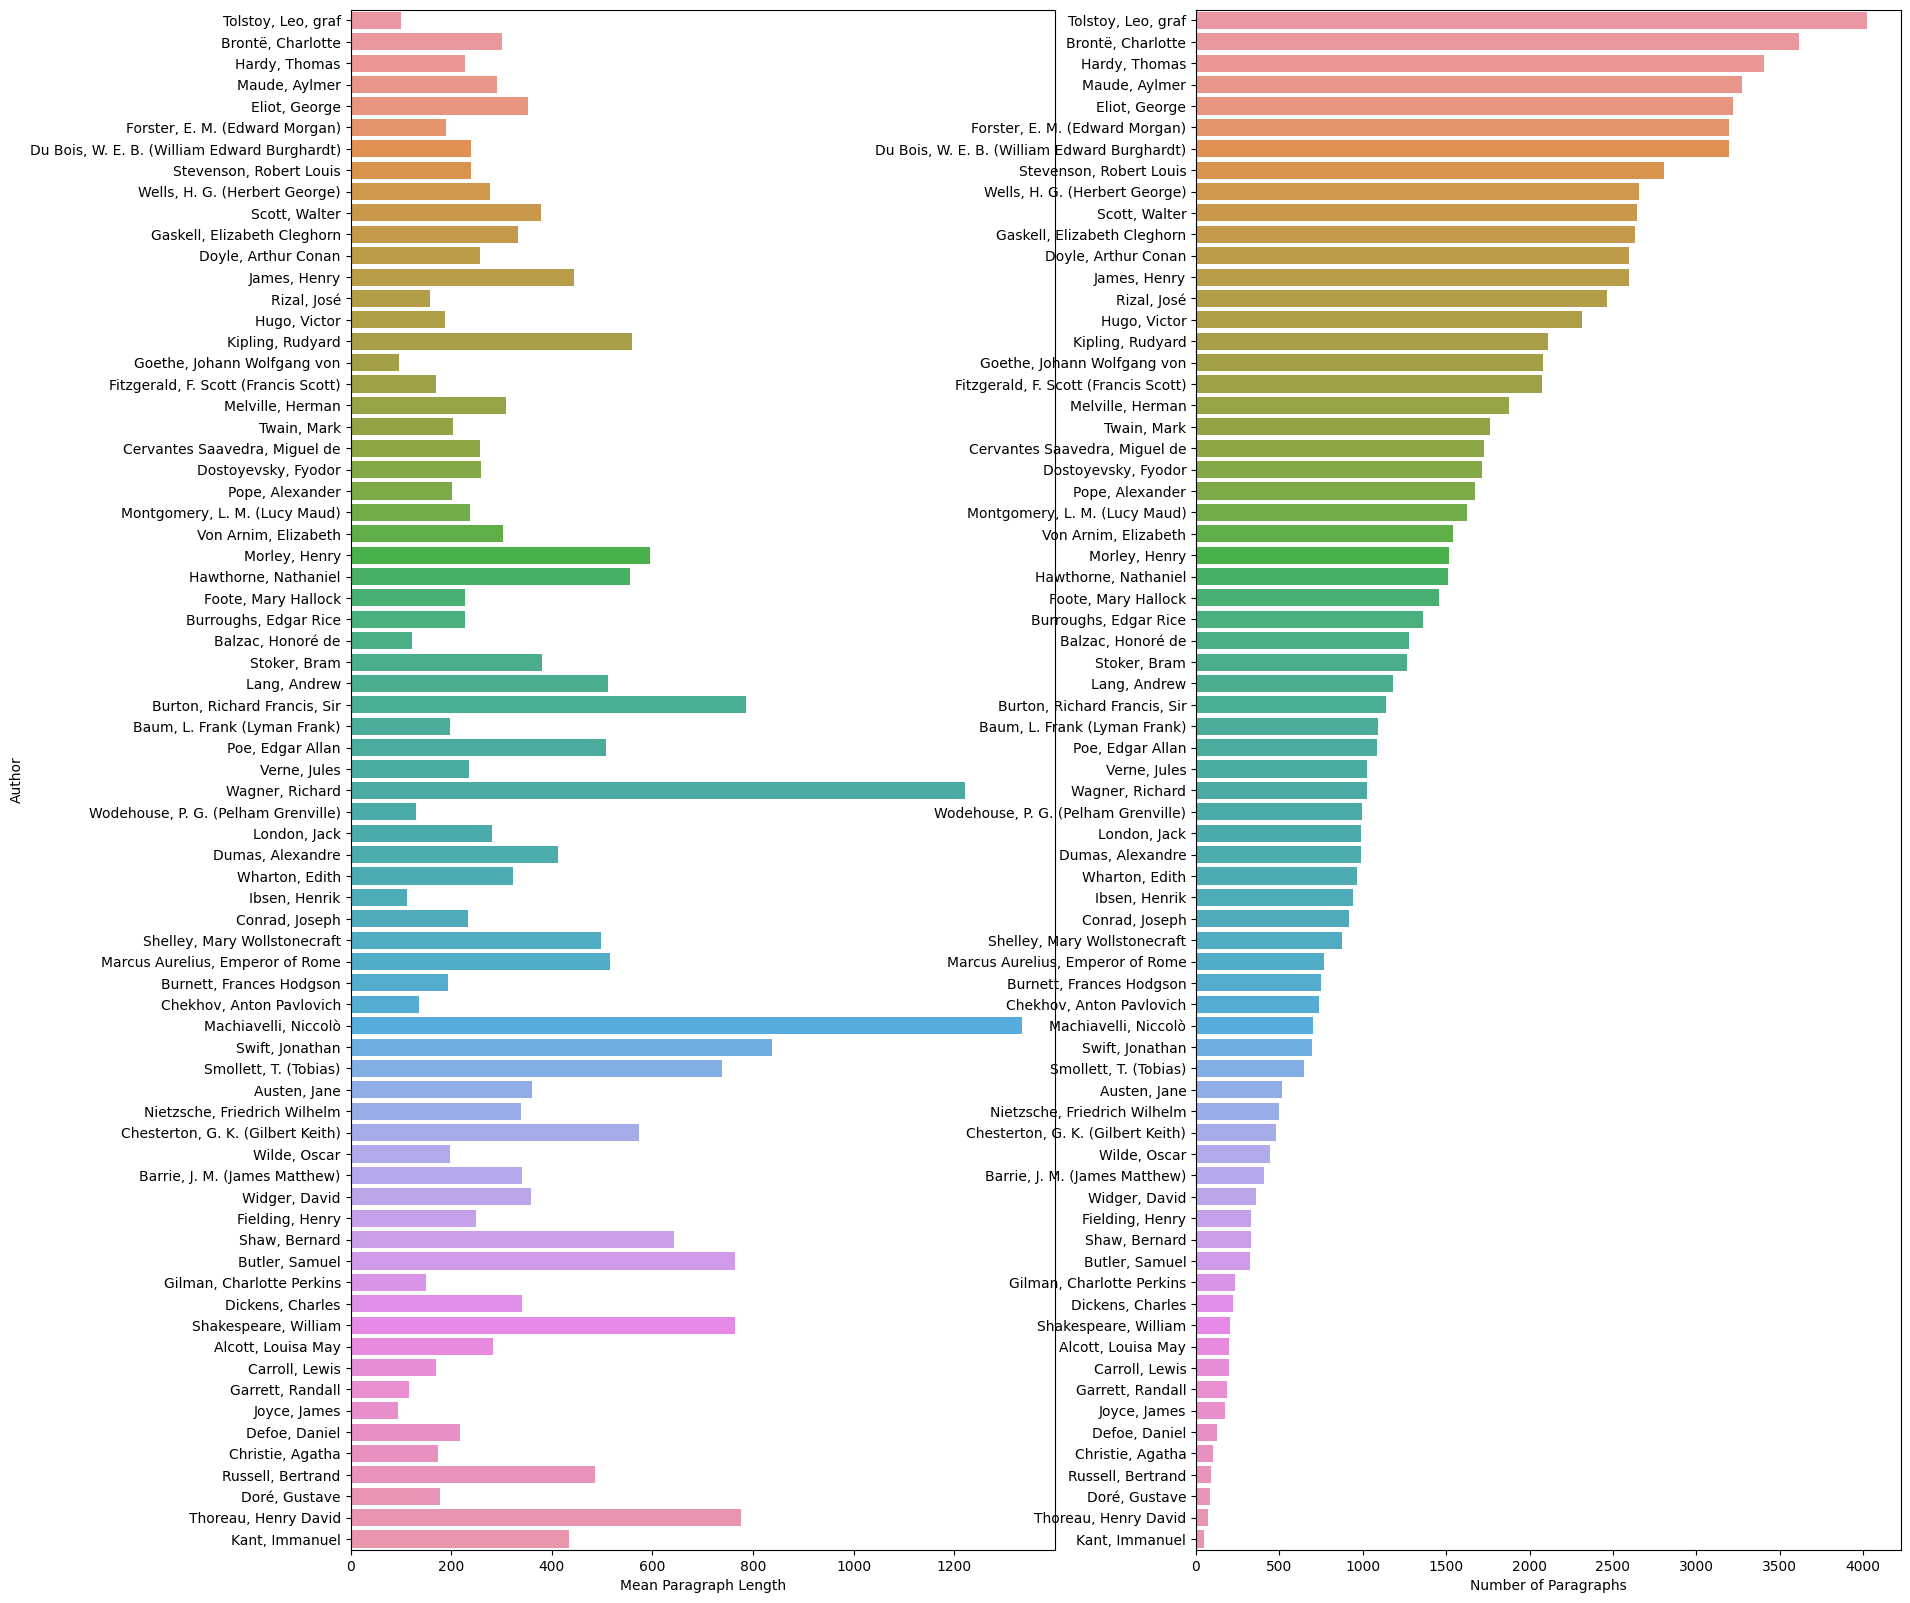

In [99]:
#plot sorted number of paragraph length vs author
df_paragraphs = df_paragraphs.sort_values(by=['Number of Paragraphs'], ascending=False)

#plot with seaborn without authors
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
ax = sns.barplot(x="Mean Paragraph Length", y="Author", data=df_paragraphs)
plt.subplot(1,2,2)
#sns remove y label
ax = sns.barplot(x="Number of Paragraphs", y="Author", data=df_paragraphs)
ax.set(ylabel=None)

[Text(0, 0.5, '')]

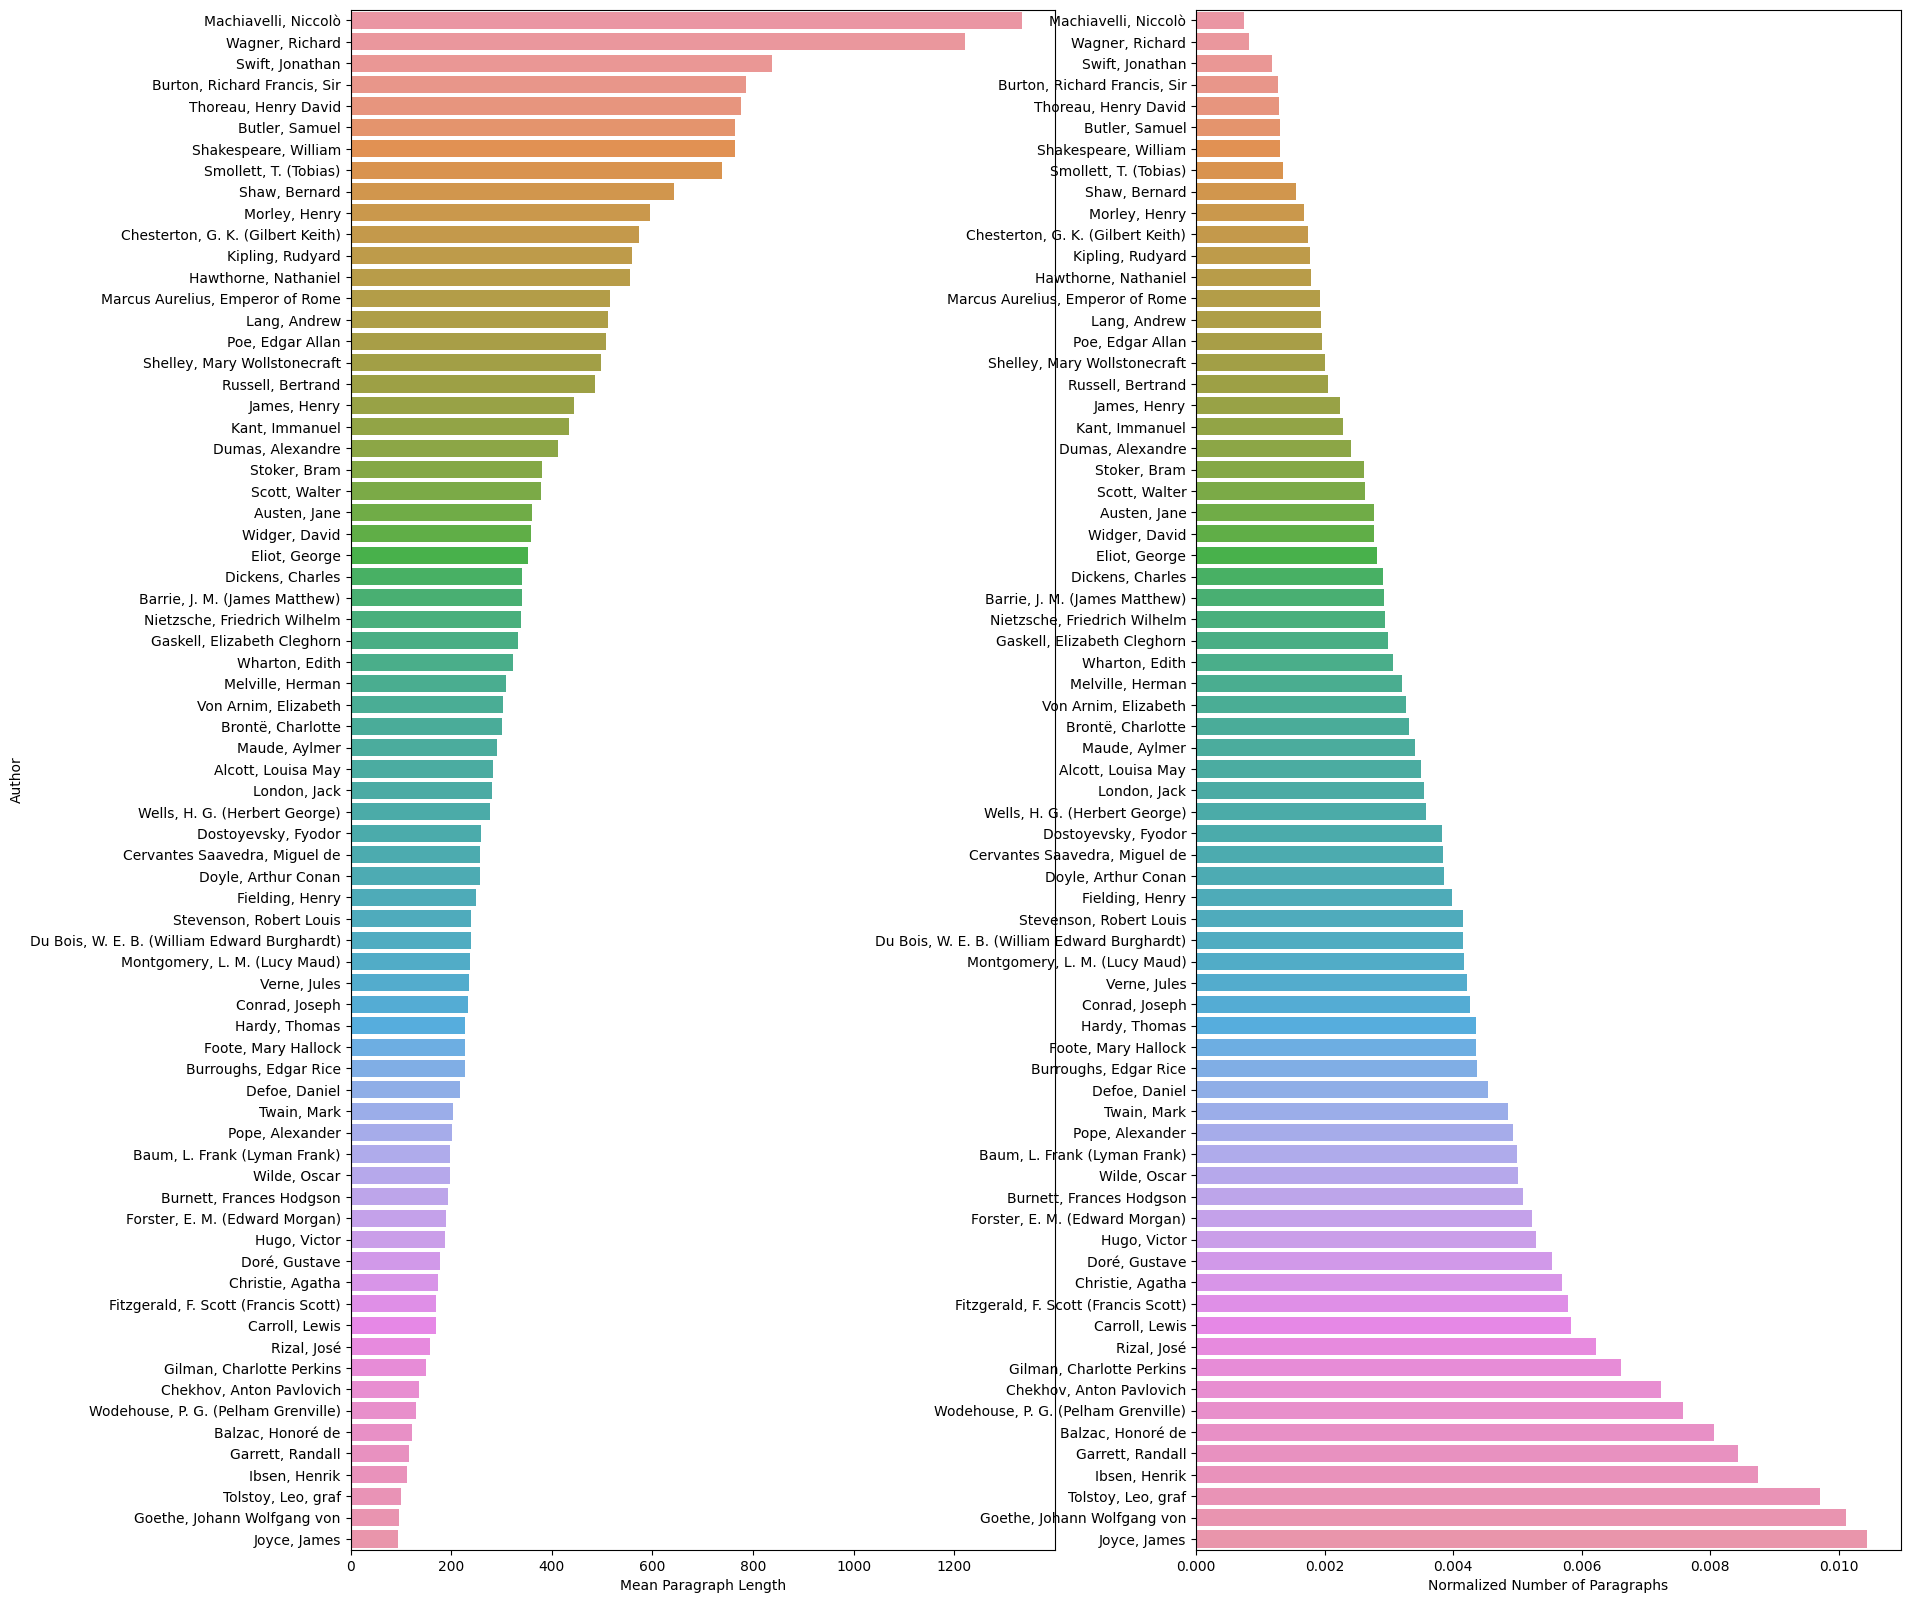

In [100]:
#plot sorted mean paragraph length vs author
df_paragraphs = df_paragraphs.sort_values(by=['Mean Paragraph Length'], ascending=False)

#plot with seaborn without authors
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
ax = sns.barplot(x="Mean Paragraph Length", y="Author", data=df_paragraphs)
plt.subplot(1,2,2)
#sns remove y label
ax = sns.barplot(x="Normalized Number of Paragraphs", y="Author", data=df_paragraphs)
ax.set(ylabel=None)

<AxesSubplot: xlabel='Stopwords Quantity', ylabel='Author'>

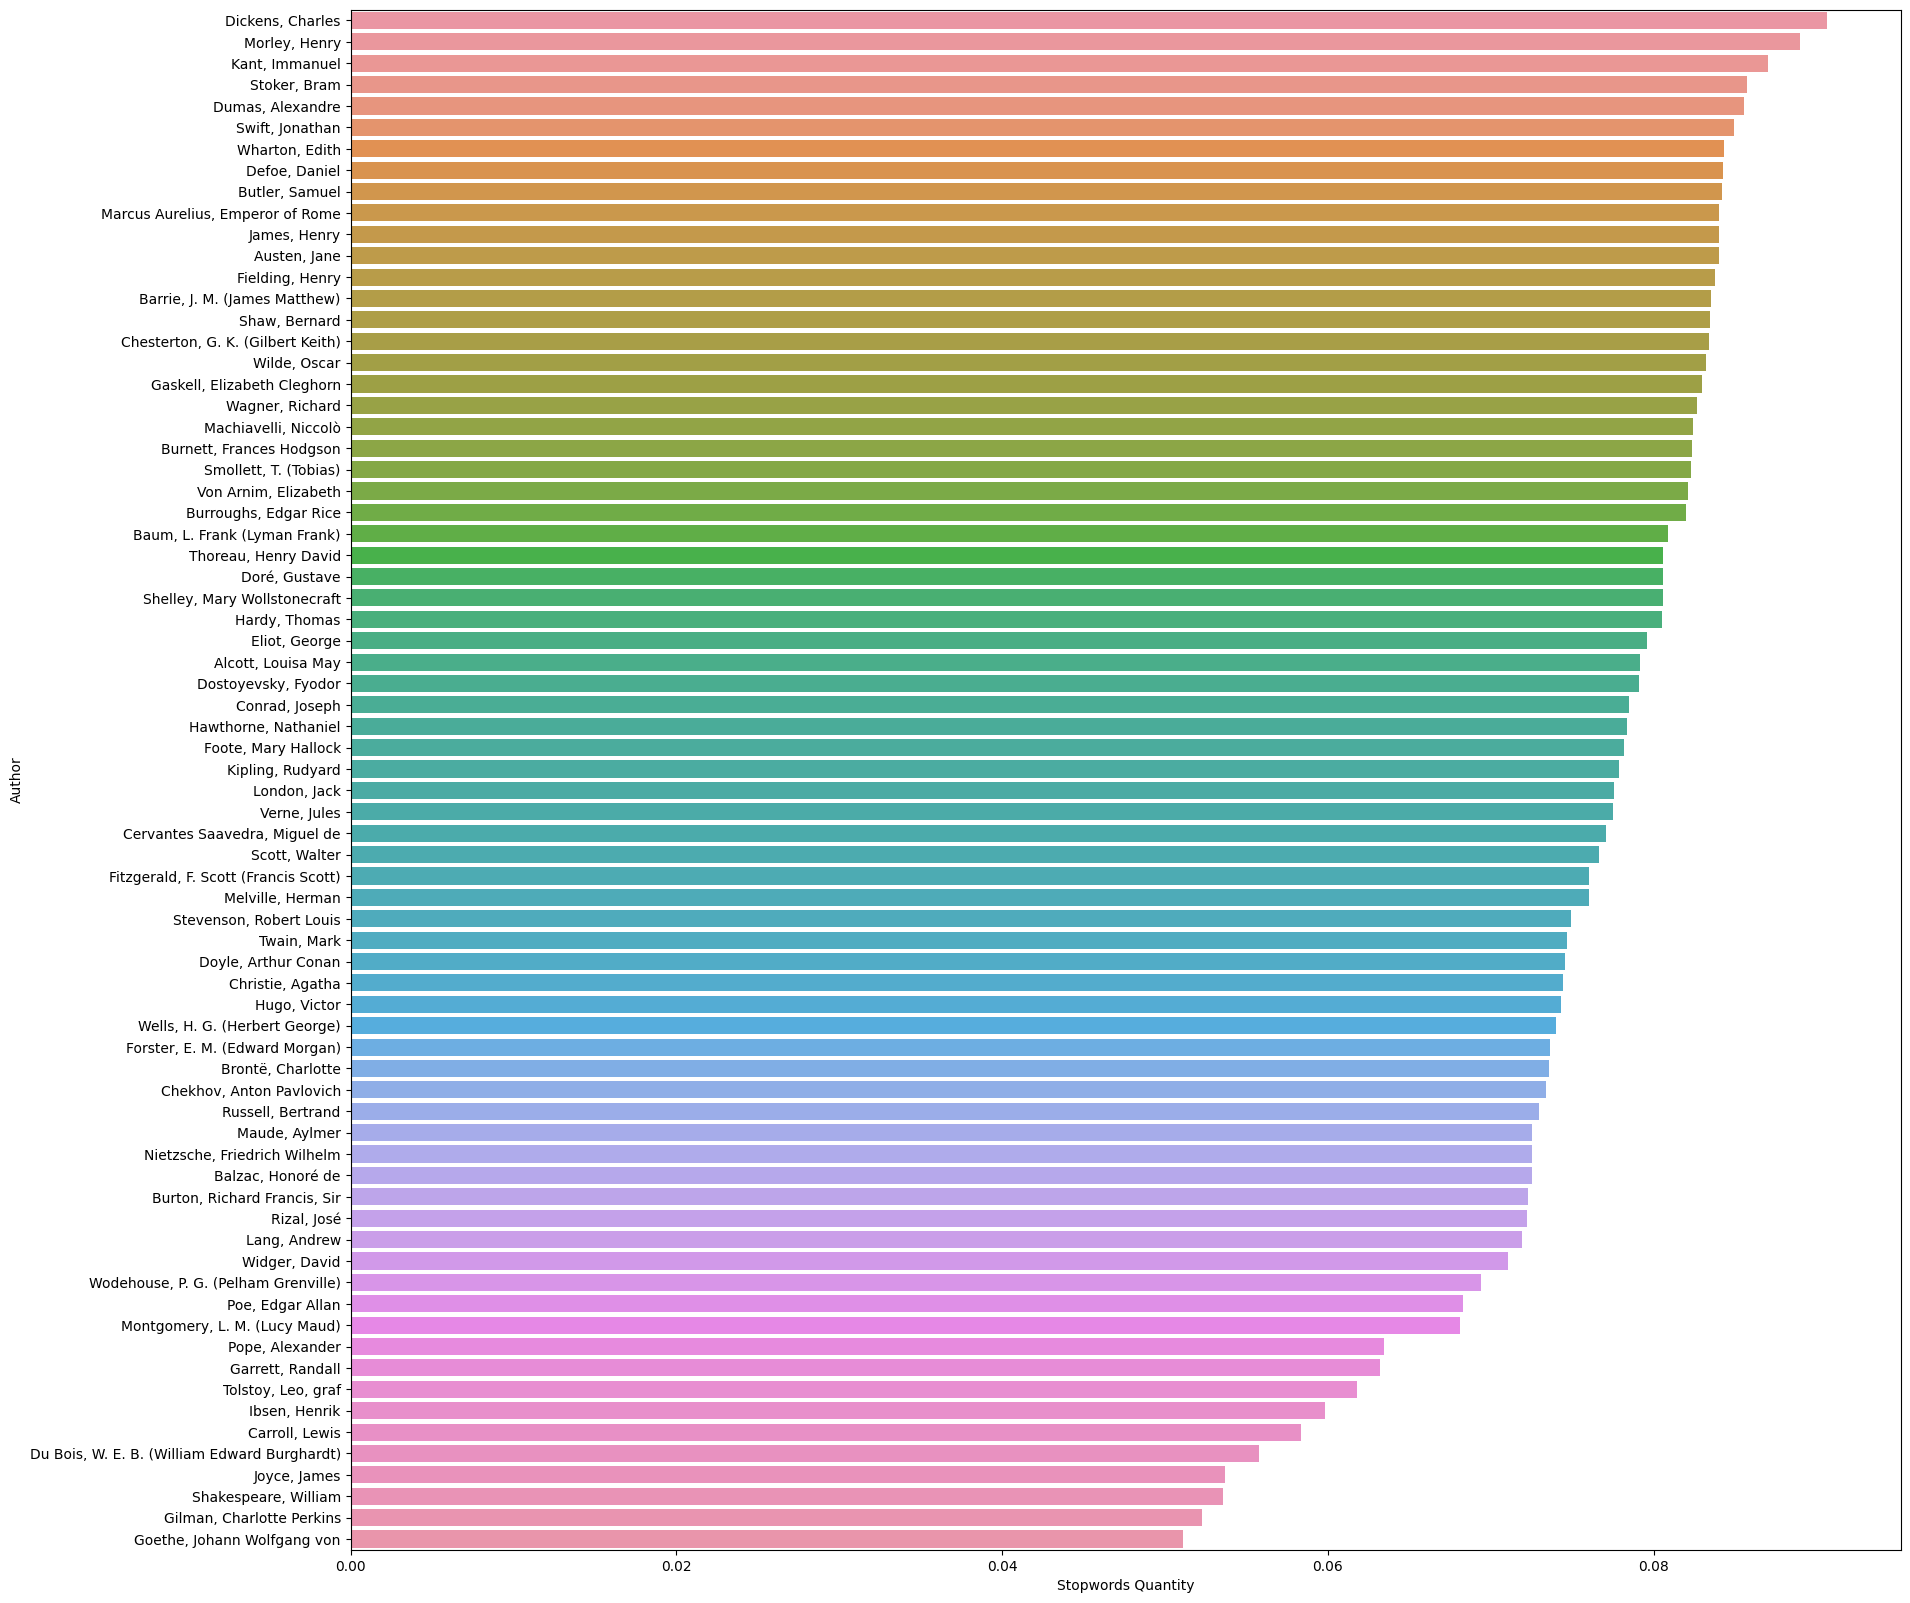

In [107]:
#plot stopwords quantity by author
_stopwords = set(stopwords.words('english'))
authors = []
stopwords_quantity = []
for index, row in df_metadata.iterrows():
    authors.append(row['Authors'])
    book = row['Books']
    stopwords_quantity.append(len([word for word in book.split() if word in _stopwords])/len(book))
#sort by mean paragraph length
df_stopwords = pd.DataFrame({'Author': authors, 'Stopwords Quantity': stopwords_quantity})
df_stopwords = df_stopwords.sort_values(by=['Stopwords Quantity'], ascending=False)

#plot with seaborn without authors
plt.figure(figsize=(20,20))
sns.barplot(x="Stopwords Quantity", y="Author", data=df_stopwords)

<AxesSubplot: xlabel='Punctuation Quantity', ylabel='Author'>

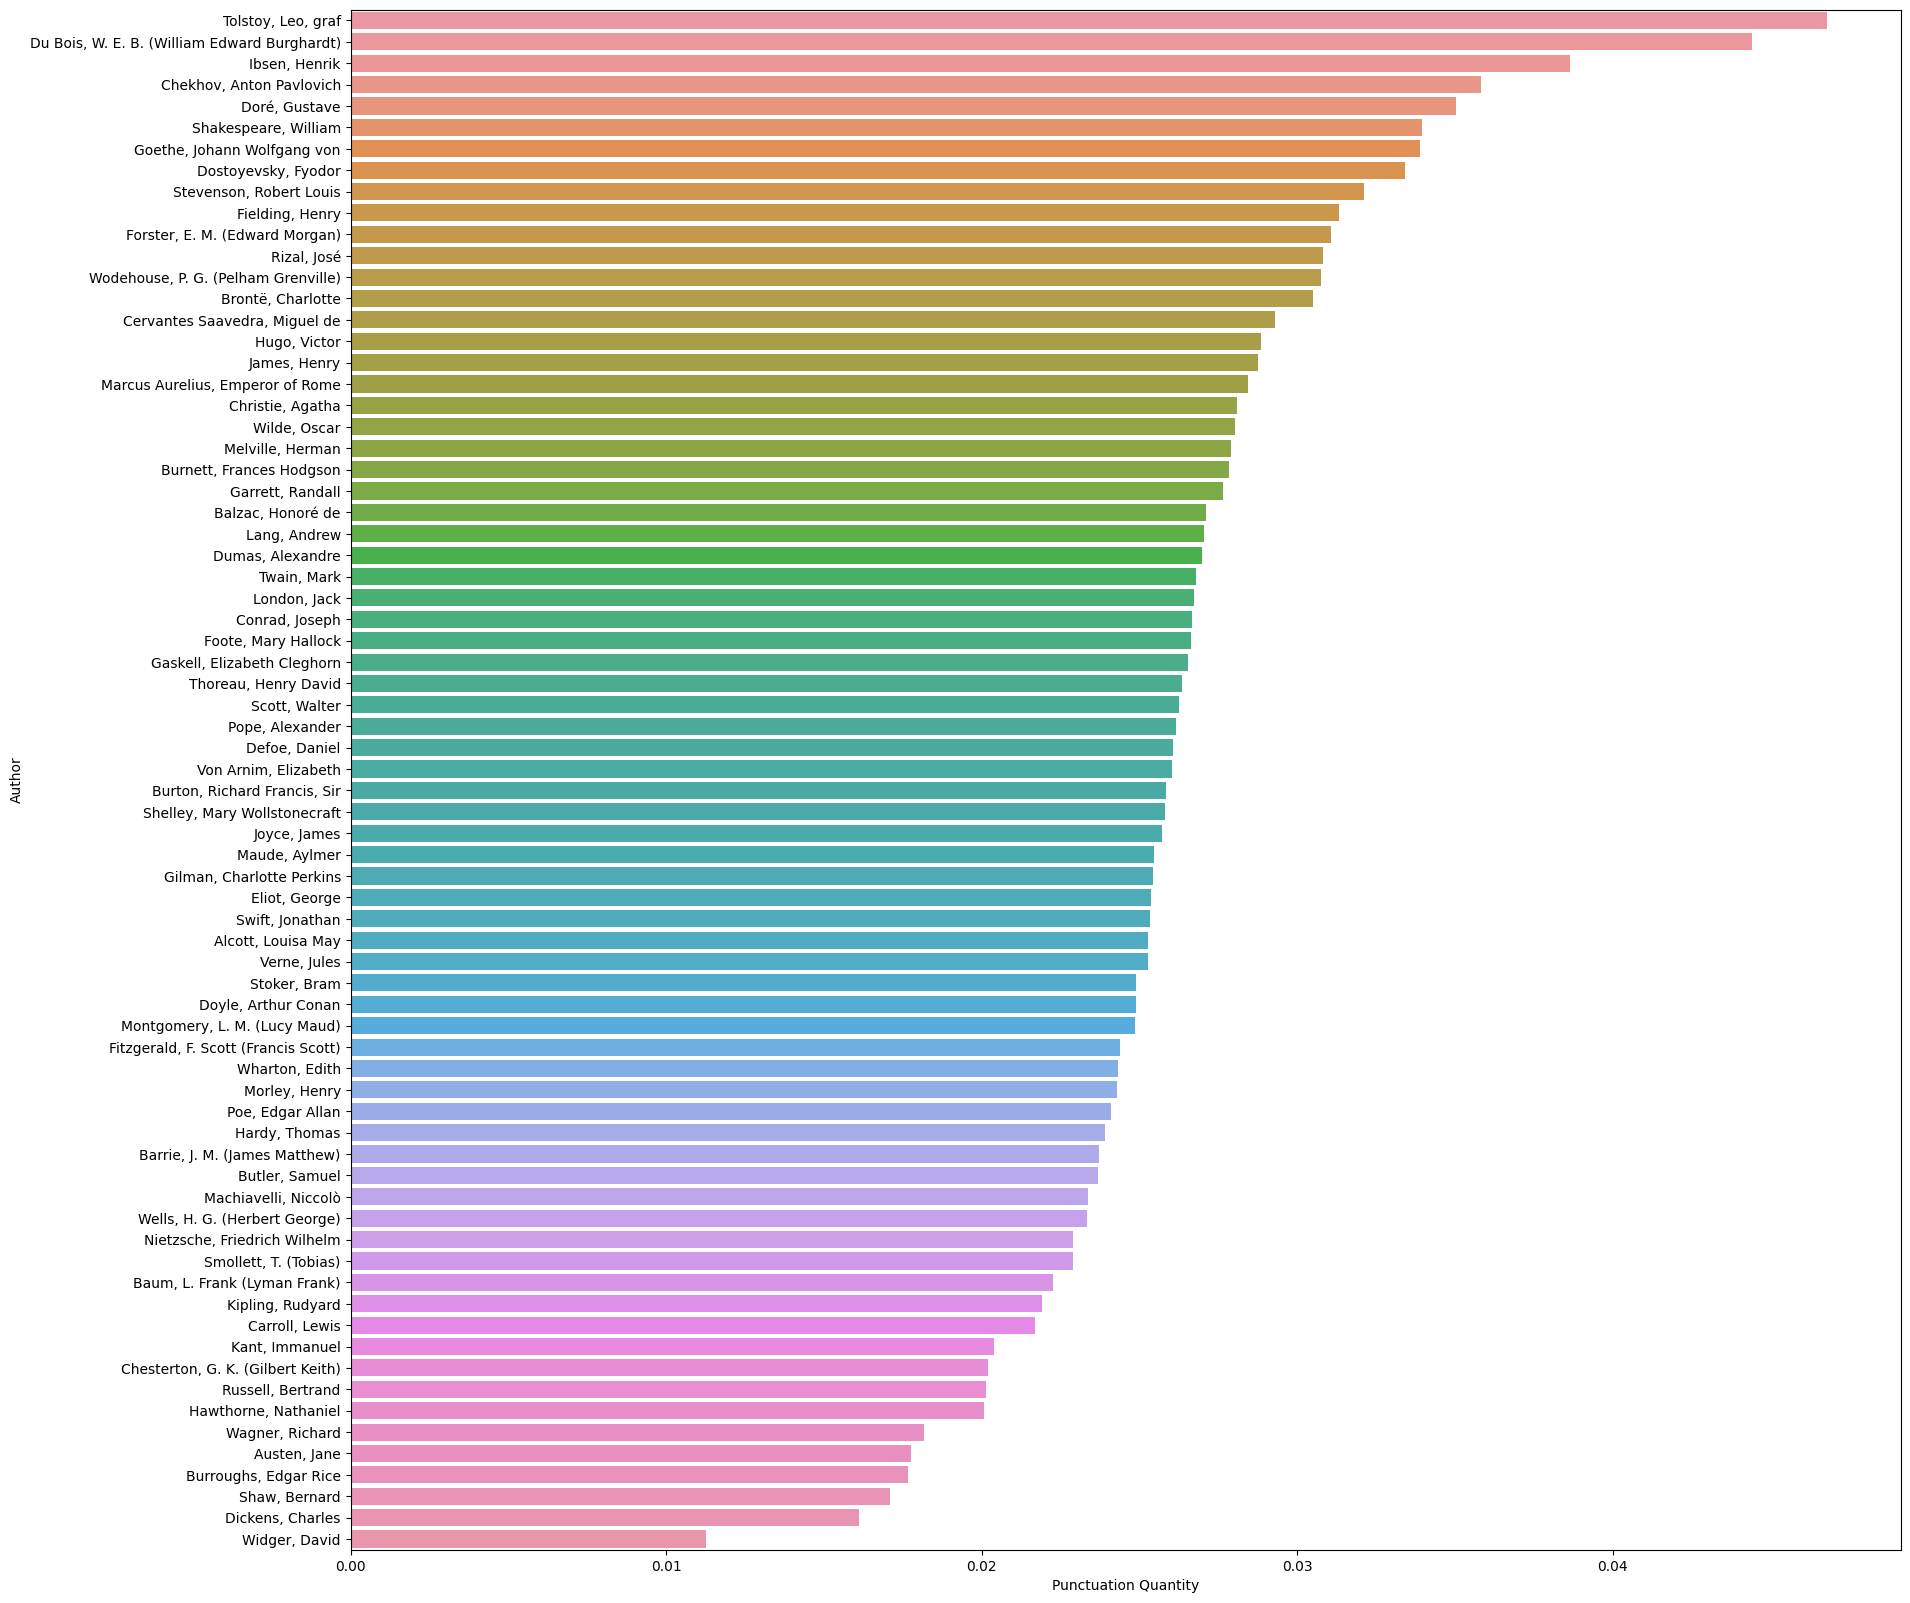

In [108]:
# plot punctuation quantity by author
authors = []
punctuation_quantity = []
punctuantions = ['.', ',', ';', ':', '!', '?']
regex_pattern = '|'.join(map(re.escape, punctuantions))
for index, row in df_metadata.iterrows():
    authors.append(row['Authors'])
    book = row['Books']
    #count ocurrences of each punctuation
    punctuation_quantity.append(len(re.findall(regex_pattern, book))/len(book))
#sort by quantity
df_punctuation = pd.DataFrame({'Author': authors, 'Punctuation Quantity': punctuation_quantity})
df_punctuation = df_punctuation.sort_values(by=['Punctuation Quantity'], ascending=False)
#plot
plt.figure(figsize=(20,20))
sns.barplot(x="Punctuation Quantity", y="Author", data=df_punctuation)

In [106]:
#print head of df
df_paragraphs.head(15)

,Author,Mean Paragraph Length,Number of Paragraphs,Normalized Number of Paragraphs
42,"Machiavelli, Niccolò",1333.285511,704,0.000749
66,"Wagner, Richard",1221.575758,1023,0.000817
60,"Swift, Jonathan",838.438672,693,0.001190
8,"Burton, Richard Francis, Sir",785.711522,1137,0.001270
61,"Thoreau, Henry David",776.541667,72,0.001284
9,"Butler, Samuel",764.031153,321,0.001305
54,"Shakespeare, William",763.127451,204,0.001307
57,"Smollett, T. (Tobias)",738.868624,647,0.001350
55,"Shaw, Bernard",641.879154,331,0.001553
47,"Morley, Henry",595.815720,1514,0.001673


) missing from current font.3777.py:16: UserWarning: Glyph 13 (
  plt.savefig('wordclouds_' + author + '.png')
) missing from current font.hon3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


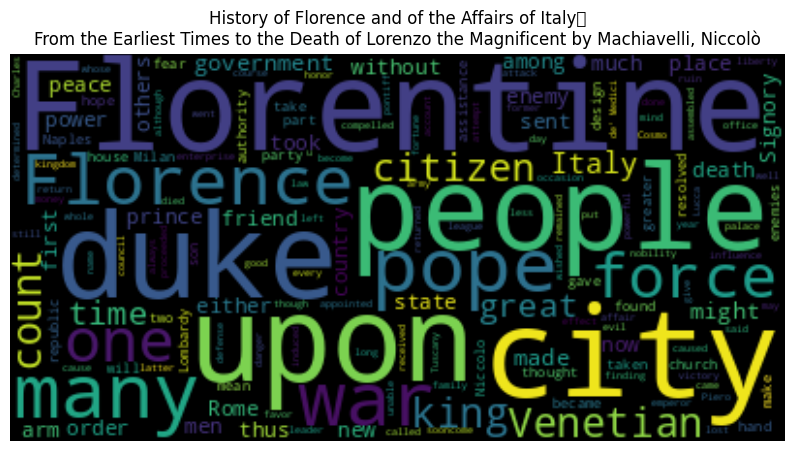

) missing from current font.3777.py:25: UserWarning: Glyph 13 (
  plt.savefig('wordclouds_' + author + '_without_stopwords.png')


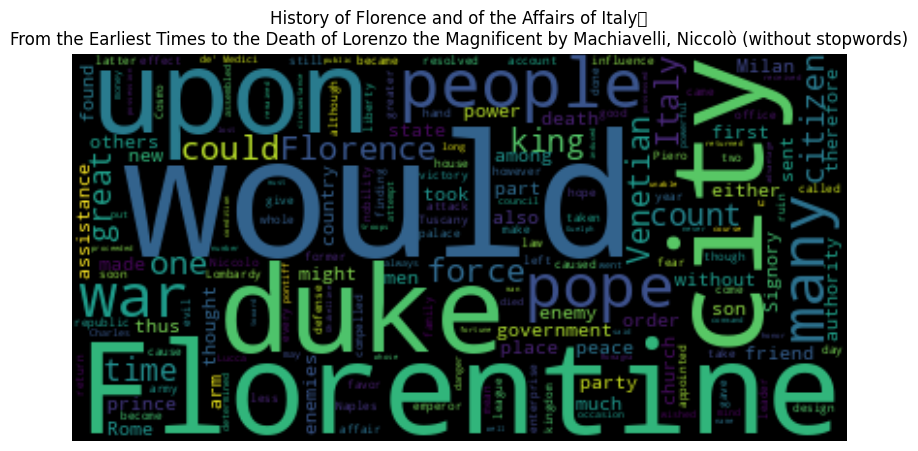

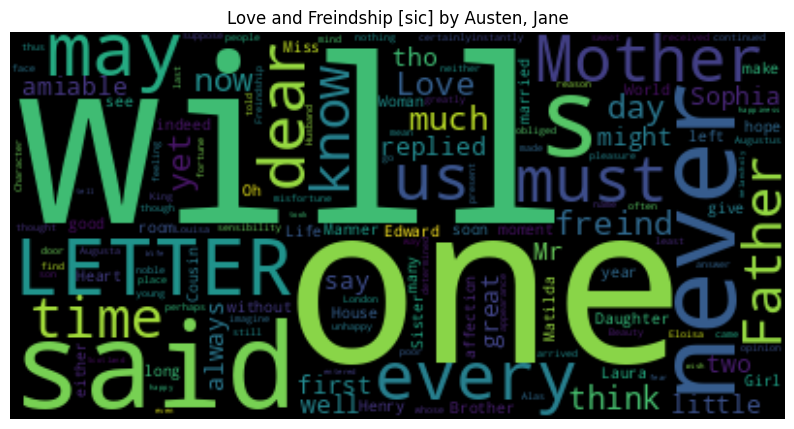

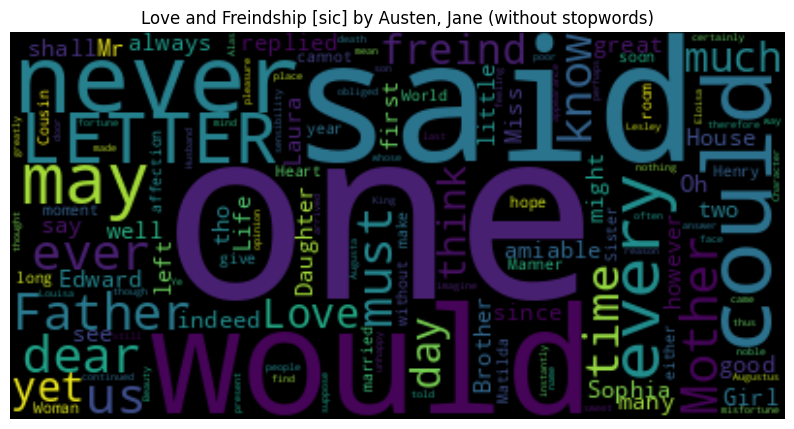

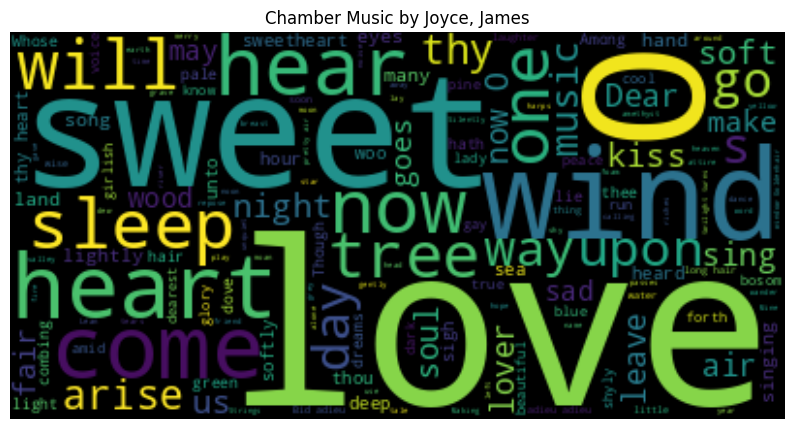

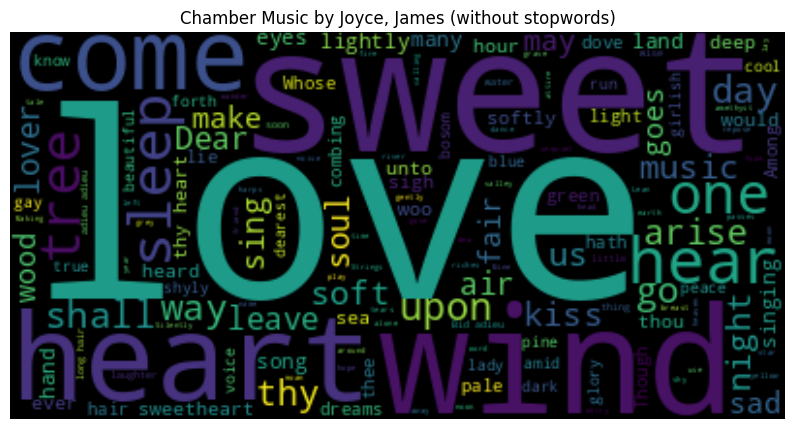

In [103]:
selected_authors = ['Machiavelli, Niccolò', 'Austen, Jane', 'Joyce, James']

_stopwords = set(stopwords.words('english')) 


# for each author plot word cloud
for author in selected_authors:
    text = df_metadata[df_metadata['Authors'] == author]['Books'].values[0]
    book = df_metadata[df_metadata['Authors'] == author]['Title'].values[0]
    wordcloud = WordCloud().generate(text)
    plt.figure(figsize=(10,10))
    plt.title(book + " by " + author)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('wordclouds_' + author + '.png')
    plt.show()

    plt.figure(figsize=(10,10))
    plt.title(book + " by " + author + " (without stopwords)")

    wordcloud = WordCloud(stopwords=_stopwords).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('wordclouds_' + author + '_without_stopwords.png')
    plt.show()


In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

books = df_metadata['Books'].values
titles = df_metadata['Title'].values
tfidf = TfidfVectorizer(ngram_range=(1,1), max_df=1, min_df=0, max_features=None, analyzer='word', stop_words="english")
TNG_tfidf = tfidf.fit_transform(books)
feature_names = tfidf.get_feature_names_out()
#get average tf-idf score for each word
average_tfidf = np.mean(TNG_tfidf, axis=0)
#df = pd.DataFrame(average_tfidf.T, index=feature_names, columns=["TF-IDF"])
print(titles[70])
df = pd.DataFrame(TNG_tfidf[70].T.todense(), index=feature_names, columns=["TF-IDF"])
df = df.sort_values(by='TF-IDF', ascending=False)
df.head(25)

The Happy Prince, and Other Tales


,TF-IDF
impression_,0.588348
pyrotechnist,0.392232
pyrotechnic,0.294174
_march_,0.196116
daffodil,0.196116
pylotechnic,0.196116
_february_,0.196116
_january_,0.098058
tavistock,0.098058
gilly,0.098058
